# Company Bankrupcy Prediction

### Dataset overview:

The data is collected from Taiwan  Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

The dataset consists of multiple financial ratio columns such as:
* Return on Assets (ROAs) 
* Gross Profits 
* Operating & Net income and Expenses
* Cash flows
* Taxes
* Growth rate
* Debt
* Turnover, Revenue, Liability, etc.

All the features are normalized in the range 0 to 1.

The target column is “Bankrupt?” (0: No, 1: Yes).

Source : https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction


### Problem to solve:

It is a classification problem.

As bankruptcy due to business failure can negatively affect the enterprise as well as the global economy, it is crucial to understand and predict whether a company is showing symptoms of getting bankrupt or not.

The problem is to develop a prediction model which will predict whether a company can go bankrupt or not. This will help the company to take appropriate decisions.

### Metrics to use:
Precision,F1 Score and AUC for evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm

In [2]:
#reading the csv file of bankruptcy data
path = "/Users/saurabhraj/Desktop/CITY AI/Intro to AI/CW/Data"
df = pd.read_csv(path + "/data.csv")

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.shape

(6819, 96)

## Columns:

In [5]:
df.columns.values

array(['Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Op

Text(0.5, 1.0, 'Class Balance')

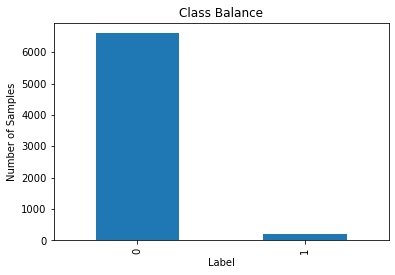

In [6]:
#plotting the distribution of labels:
df['Bankrupt?'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Class Balance')

In [5]:
len(df[df['Bankrupt?']==0])

6599

In [6]:
len(df[df['Bankrupt?']==1])

220

### Observations:
* It is highly imbalanced dataset as only 3.2% of toal data is of class label 1 (Bankrupt).
* So form here I will take two approaches:
    1. Drop majority of the data to make the dataset balance ration around 40:60. In this approach the data size will be reduced to 550 (220 class 1 and 330 class 0).
    2. My other approach will be oversample the data using different techniques. This way we will not reduce the data size.
    3. I will not use Accuracy as a metric but will use Precision,F1 Score and AUC for evaluation.
  

## Heatmap analysis on columns

<AxesSubplot:>

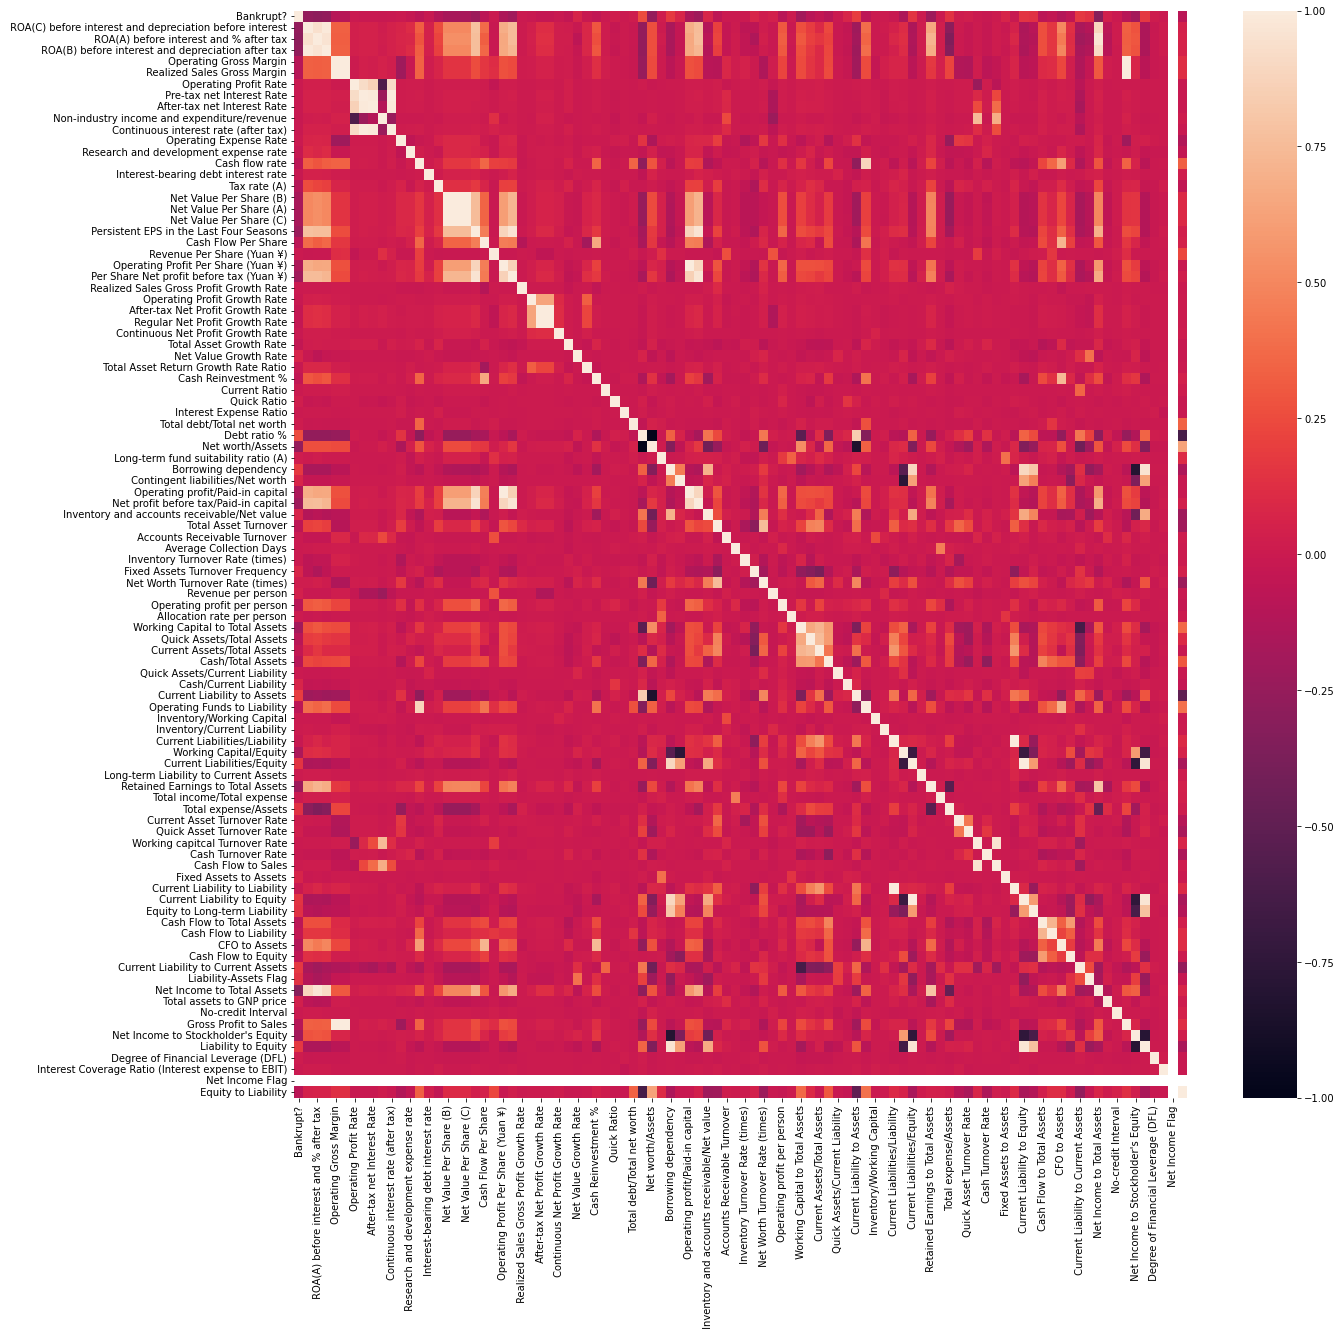

In [4]:
#plotting the correlation matrix as a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

## Observations:
* All three ROAs (ROA(a), ROA(b) and ROA(c) are positively correlated amongst each other. 
* Net value per share A,B and C are also highly correlated between each other.
* ' Debt ratio %', ' Net worth/Assets' are negatively correlated.
* After tax net interest rate and pre tax net interets rate are also highely correlated.
* ' Non-industry income and expenditure/revenue' is negatively correlated with Operating Profit Rate.
* ' Operating Profit Growth Rate',' After-tax Net Profit Growth Rate' and ' Regular Net Profit Growth Rate' are also highely correlated.
* ' Per Share Net profit before tax (Yuan ¥)' and ' Persistent EPS in the Last Four Seasons' are highely correlated.

**Similarly there are a lot of multicollinearity in the dataset.
So I can conclude from here that Regression model will not work properly on this dataset.**

In [34]:
#checking for Null values in all the columns:
for col in df.columns.values:
    print(f"{col} : {len(df[df[col].isnull()==True])}")


Bankrupt? : 0
 ROA(C) before interest and depreciation before interest : 0
 ROA(A) before interest and % after tax : 0
 ROA(B) before interest and depreciation after tax : 0
 Operating Gross Margin : 0
 Realized Sales Gross Margin : 0
 Operating Profit Rate : 0
 Pre-tax net Interest Rate : 0
 After-tax net Interest Rate : 0
 Non-industry income and expenditure/revenue : 0
 Continuous interest rate (after tax) : 0
 Operating Expense Rate : 0
 Research and development expense rate : 0
 Cash flow rate : 0
 Interest-bearing debt interest rate : 0
 Tax rate (A) : 0
 Net Value Per Share (B) : 0
 Net Value Per Share (A) : 0
 Net Value Per Share (C) : 0
 Persistent EPS in the Last Four Seasons : 0
 Cash Flow Per Share : 0
 Revenue Per Share (Yuan ¥) : 0
 Operating Profit Per Share (Yuan ¥) : 0
 Per Share Net profit before tax (Yuan ¥) : 0
 Realized Sales Gross Profit Growth Rate : 0
 Operating Profit Growth Rate : 0
 After-tax Net Profit Growth Rate : 0
 Regular Net Profit Growth Rate : 0
 Con

### Observations:
* There are no null values in the data.

## Univariate Analysis

#### ROA

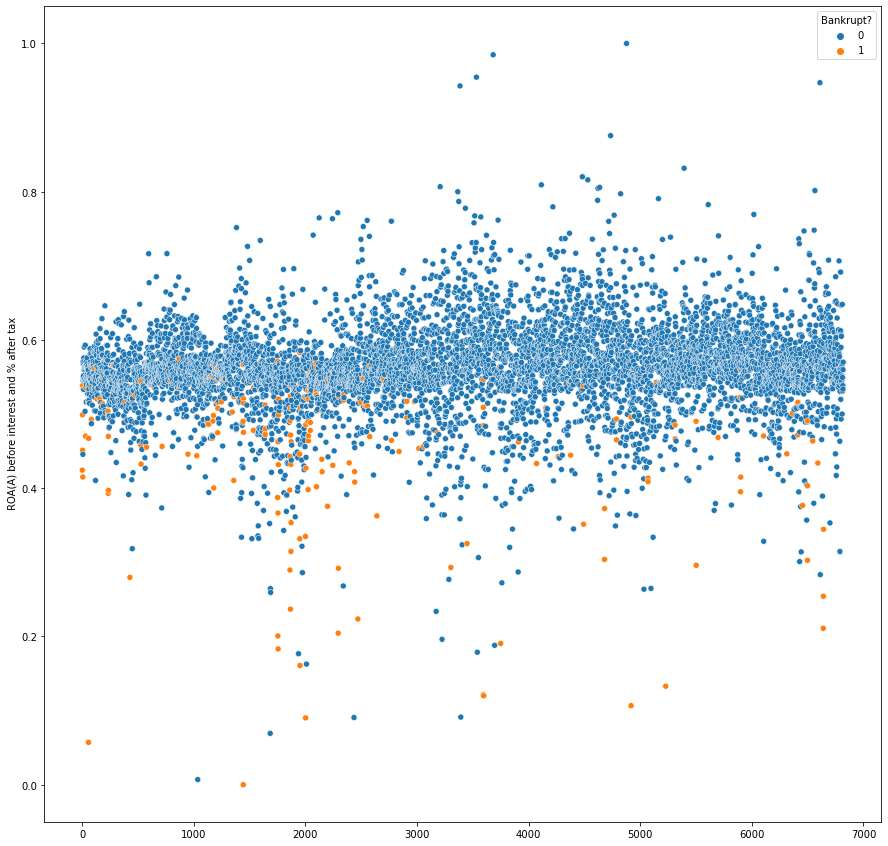

In [40]:
#plotting all the ROA(A) before interest and %after tax samples as scatter plot
fig = plt.figure(figsize = (15,15))
sns.scatterplot(x = df.index ,y = ' ROA(A) before interest and % after tax', hue = 'Bankrupt?', data = df)
plt.show()

### Observation:
* There seems to be a separation at around ROA (c) = 0.6
* Since all three ROAs are highely correlated, the behavious for other two would be similar.

#### Cash Flow Rate

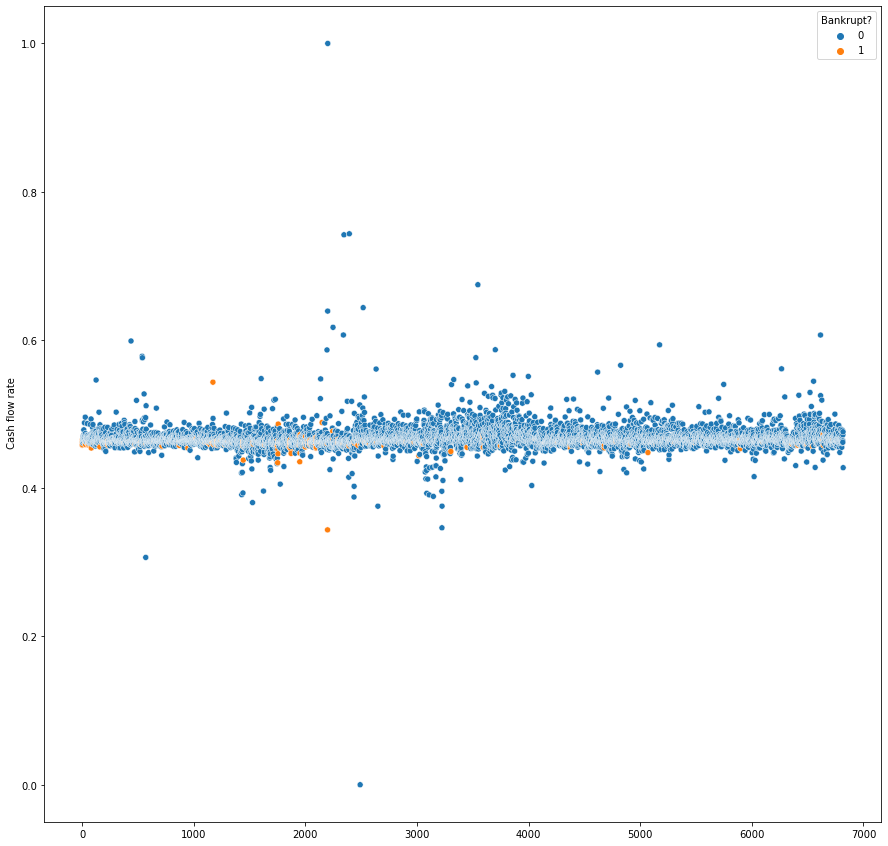

In [41]:
#plotting all the Cash flow rate samples as scatter plot
fig = plt.figure(figsize = (15,15))
sns.scatterplot(x=df.index, y = ' Cash flow rate', hue='Bankrupt?', data=df)
plt.show()

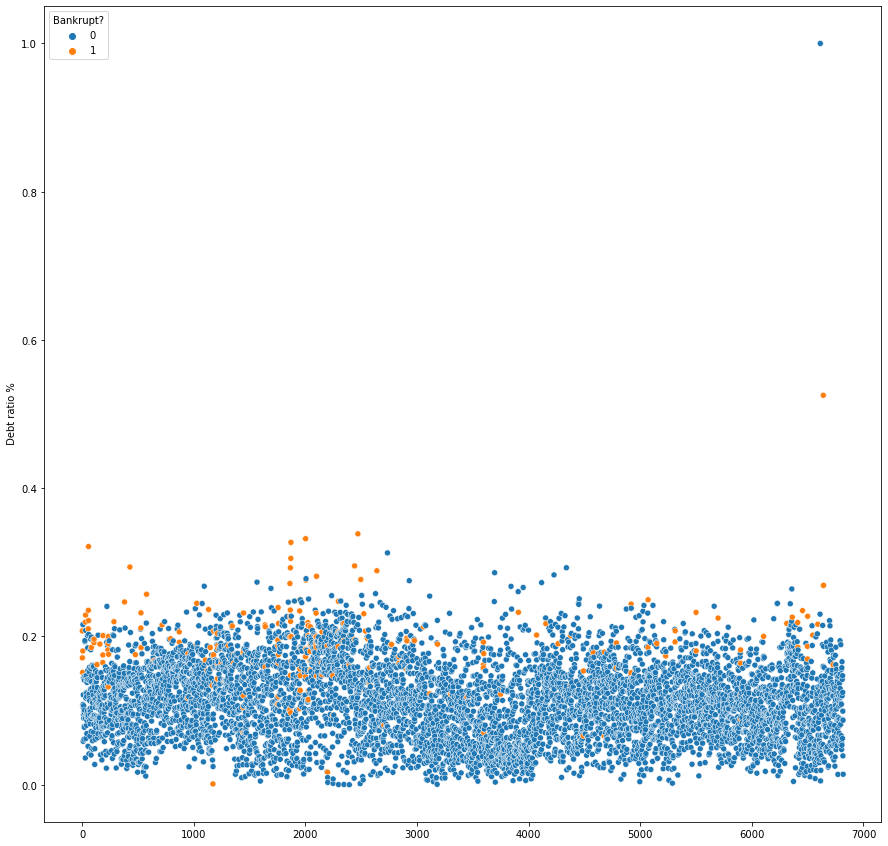

In [6]:
 #plotting all the Debt ratio % samples as scatter plot
plt.figure(figsize=(15,15))
sns.scatterplot(x=df.index , y=' Debt ratio %', hue = 'Bankrupt?', data=df)
plt.show()

Higher values of Debt ratio have more tendency to lead to bankruptcy.

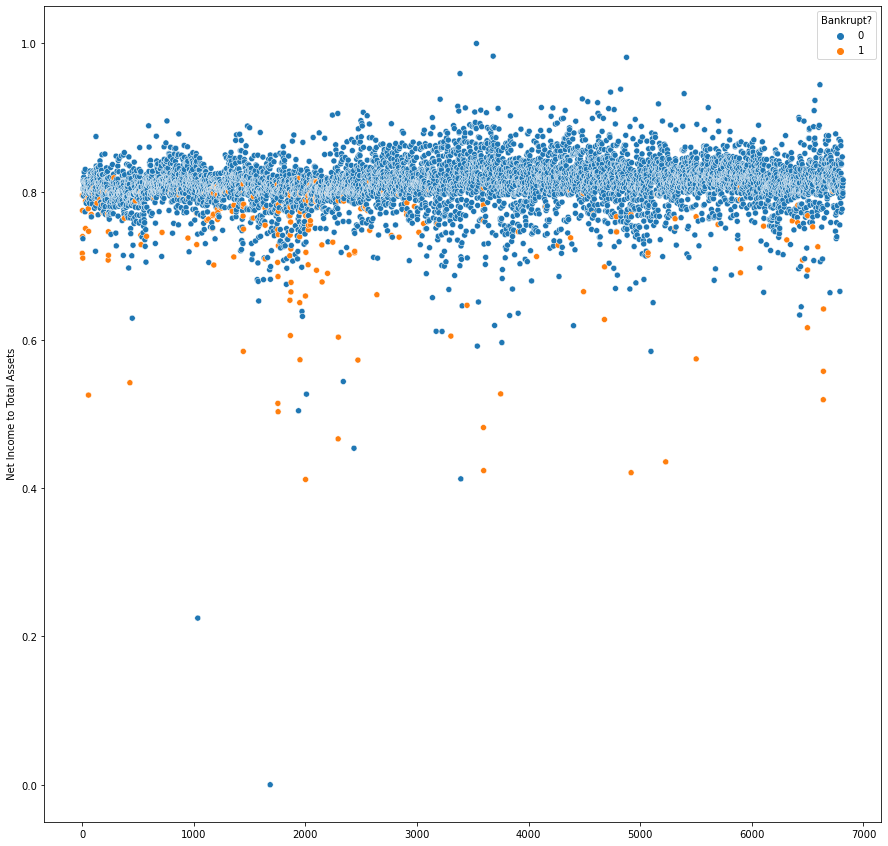

In [9]:
  #plotting all the Net Income to Total Assets samples as scatter plot
plt.figure(figsize=(15,15))
sns.scatterplot(x=df.index , y=' Net Income to Total Assets', hue = 'Bankrupt?', data=df)
plt.show()

Lower values of net income to Total assets have more tendency to lead to bankruptcy.

## Plans ahead:
1. Perform dimensionality reduction using PCA : Since it is a very high dimensional data, we need to apply dimensionality reduction technique to only use important features.
2. Upsampling the data: Since it is a highly imbalanced dataset, i will try to upsample the dataset using SMOTE.
3. Drop the populated class instances and make it balanced.
3. I will train the model using both upsampled data, reduced data and normal data and compare the metrics.
3. Split the dataset into train and test.
4. Perform k folds cross validations for different models.

In [7]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score,roc_auc_score
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Principal Component Analysis


Best value of n_component for 99% variance : 11
Best value of n_component for 95% variance : 8
Best value of n_component for 90% variance : 7


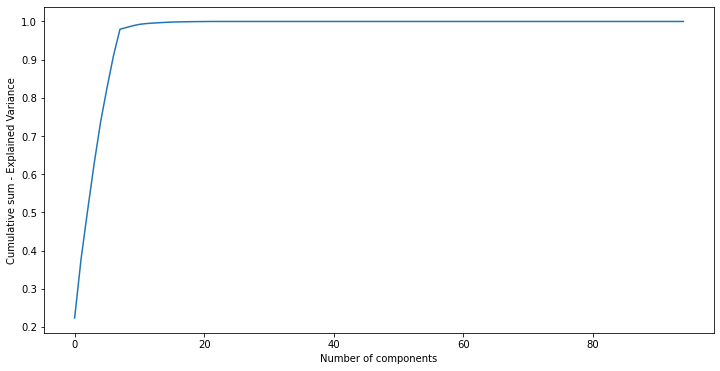

In [8]:

#extract X and y from our dataset by dropping and column indexing
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

#defining PCA 
pca = PCA().fit(X)

plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum - Explained Variance')

#fitting PCA on our X
pca = PCA(n_components=0.99).fit(X)
print(f'Best value of n_component for 99% variance : {pca.n_components_}')

pca = PCA(n_components=0.95).fit(X)
print(f'Best value of n_component for 95% variance : {pca.n_components_}')

pca = PCA(n_components=0.90).fit(X)
print(f'Best value of n_component for 90% variance : {pca.n_components_}')




Since it is a very high dimensional data, we need to apply dimensionality reduction technique to only use important features.

It can be clearly interpreted from this curve that only 11 components (features) accounts for 99% of the variance in data.
In other words we can also say that 99% of the information present in data can be obtained by using merely those top 11 features instead of 95 features.

So I will transform my data using PCA.

In [9]:
X_pca = PCA(11).fit_transform(X) 

# 2 Dealing with imbalancy

## 2.1 SMOTE

In [10]:
X_pca.shape

(6819, 11)

In [9]:
#transforming the data with SMOTE:

X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.25, random_state=42 )
print("Before Oversampling : ")
print(f"                       Bankrupt 1 = {sum(y_train==1)}")
print(f"                       Bankrupt 0 = {sum(y_train==0)}")
print("========="*6)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After Oversampling : ")
print(f"                       Bankrupt 1 = {sum(y_train_smote==1)}")
print(f"                       Bankrupt 0 = {sum(y_train_smote==0)}")

Before Oversampling : 
                       Bankrupt 1 = 162
                       Bankrupt 0 = 4952
After Oversampling : 
                       Bankrupt 1 = 4952
                       Bankrupt 0 = 4952


### Confusion Matrix

In [10]:

def plot_consufion_matrix(cm, classes, title = 'Confusion Matrix', normalize = False,cmap = plt.cm.Blues ):
        """
    This function plots the confusion matrix
    Args: cm - conusion matrix generated using sklearn
          classes - distinct labels of our data class
          normalize = Boolean for normalizing the matrix
          cmap - color maping of plot
          title- title for our plot
    Returns: None (Plots the conufsion matrix using matplotlib)
    """
     #Normalizes the values of matrix if we pass normalize=True
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j,i,cm[i][j], color = 'red', size = 'xx-large', ha = 'center',weight='extra bold')
    
    
def print_evaluation_report(y_test, y_pred, y_pred_proba):
    """This function prints the merices involved for evalutions of the model.
        It also calls the confusioj matrix plot function
    """
    
    cm = confusion_matrix(y_test, y_pred)
    #np.set_printoptions(precision=2)
    #print(cm)
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    
    print('F1 Score : %.2f' % f1)
    print('AUC ROC : %.2f' % auc)
    print('Precision : %.2f' % precision)
    
    classes = [0,1]
    plt.figure()
    plot_consufion_matrix(cm, classes,title = 'Confusion Matrix', normalize = False)
    plt.show()
    return
    
    
    

### Decision Trees ( SMOTE + PCA )

In [20]:


def getBestDecisionTree(max_depth = [10,20,25,30,35,40,50],
                       criterion = ['gini', 'entropy', 'log_loss'],
                       min_samples_split = [10,20,30,40]):
    """
    This function takes into accout different combinations of hyperparameters involed in Decision trees
    and performs some hyperparameter tuning.
    I am considering F1 score (macro) to decide the best combination of parameters
    Args: max_depth - list of different depths,
        criterion - list of different criterion
        min_samples_split - list of different min_samples_split
    Returns: The parameters corresponding to best F1 score
    """
    best_params = []
    best_f1 = 0
    for criteria in criterion:
        for depth in max_depth:
            for min_samples in min_samples_split:
                dt_smote = DecisionTreeClassifier(max_depth=depth, criterion = criteria, min_samples_split = min_samples)
                dt_smote.fit(X_train_smote, y_train_smote)

                y_pred = dt_smote.predict(X_test)
                y_pred_proba = dt_smote.predict_proba(X_test)[:,1]
                
                f1 = f1_score(y_test, y_pred, average='macro')
                if f1>best_f1:
                    best_f1 = f1
                    best_params = [criteria, depth, min_samples]
                    
                #print(criteria, depth, min_samples, f1)
                
    return best_params
        
    

In [21]:
getBestDecisionTree()

['entropy', 40, 10]

F1 Score : 0.53
AUC ROC : 0.61
Precision : 0.08


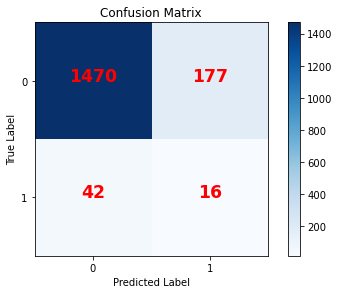

In [22]:

#training decisoin trees
dt_smote = DecisionTreeClassifier(max_depth=40, criterion = 'entropy', min_samples_split = 10)
dt_smote.fit(X_train_smote, y_train_smote)

y_pred = dt_smote.predict(X_test)
y_pred_proba = dt_smote.predict_proba(X_test)
#taking the probabilities of positive classs
y_pred_proba = y_pred_proba[:,1]

#print(y_pred)
print_evaluation_report(y_test, y_pred, y_pred_proba)


### Support Vector Classifier ( SMOTE + PCA )

In [18]:


svc_smote = SVC(kernel='rbf', C=10,probability=True).fit(X_train_smote, y_train_smote)

y_pred = svc_smote.predict(X_test)




F1 Score : 0.52
AUC ROC : 0.68
Precision : 0.08


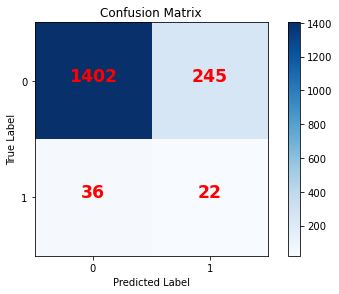

In [19]:
y_pred_proba = svc_smote.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]
print_evaluation_report(y_test, y_pred, y_pred_proba)

### KNN Classifier (PCA + SMOTE)

In [28]:

def getBestKnn(weights = ['uniform','distance'],n_neighbors=[5,10,15,20,30,50,100,200]):
    """
    This function takes into accout different combinations of hyperparameters involed in KNN classifier
    and performs some hyperparameter tuning.
    I am considering F1 score (macro) to decide the best combination of parameters
    Args: weights - list of different methods of distance calculation,
        n_neighbors - list of different nearest neighbors
        
    Returns: The parameters corresponding to best F1 score
    """
    best_params = []
    best_f1 = 0
    for n in n_neighbors:
        for w in weights:
            knn = KNeighborsClassifier(n_neighbors=n, weights=w).fit(X_train_smote,y_train_smote)
            y_pred = knn.predict(X_test)
            #y_pred_proba = knn.predict_proba(X_test)[:,1]

            f1 = f1_score(y_test, y_pred, average='macro')
            if f1>best_f1:
                best_f1 = f1
                best_params = [n,w]
            print(f'{n,w} : {f1}')
        
    return best_params
        
    
    

In [29]:
getBestKnn()

(5, 'uniform') : 0.5287613318389411
(5, 'distance') : 0.5319400348523549
(10, 'uniform') : 0.5343536467758674
(10, 'distance') : 0.5378259121231052
(15, 'uniform') : 0.5165172483563234
(15, 'distance') : 0.5197485854540551
(20, 'uniform') : 0.5161134950845523
(20, 'distance') : 0.5165172483563234
(30, 'uniform') : 0.4938891269306891
(30, 'distance') : 0.5066606094492592
(50, 'uniform') : 0.47655161238048943
(50, 'distance') : 0.48805916807432703
(100, 'uniform') : 0.4501466275659824
(100, 'distance') : 0.46568038100031217
(200, 'uniform') : 0.4032295675289015
(200, 'distance') : 0.44678664580073035


[10, 'distance']

F1 Score : 0.54
AUC ROC : 0.73
Precision : 0.10


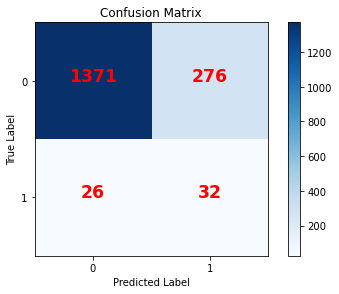

In [30]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance').fit(X_train_smote,y_train_smote)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]
print_evaluation_report(y_test,y_pred,y_pred_proba)

### Random Forest Classifier (PCA + SMOTE)

In [31]:

def getBestRF(criterion = ['entropy','log_loss'],estimators=[5,10,15,20,30,50,100,150,200,250,300,400,500]):
    """
    This function takes into accout different combinations of hyperparameters involed in Random Forest classifier
    and performs some hyperparameter tuning.
    I am considering F1 score (macro) to decide the best combination of parameters
    Args: criterion - list of different methods for deciding feature to use for spliting,
        estimators - list of different nearest estimators
        
    Returns: The parameters corresponding to best F1 score
    """
    best_params = []
    best_f1 = 0
    for c in criterion:
        for n in estimators:
            rf = RandomForestClassifier(n_estimators=n, criterion=c).fit(X_train_smote,y_train_smote)
            y_pred = rf.predict(X_test)
            #y_pred_proba = knn.predict_proba(X_test)[:,1]

            f1 = f1_score(y_test, y_pred, average='macro')
            if f1>best_f1:
                best_f1 = f1
                best_params = [c,n]
            print(f'{c,n} : {f1}')
        
    return best_params
        
    
    

In [32]:
getBestRF()

('entropy', 5) : 0.5339990183578529
('entropy', 10) : 0.5566635745207174
('entropy', 15) : 0.5546833035190688
('entropy', 20) : 0.5586582045531411
('entropy', 30) : 0.545200096178411
('entropy', 50) : 0.5610876911757458
('entropy', 100) : 0.5548619846676002
('entropy', 150) : 0.5429592256396698
('entropy', 200) : 0.5435124201181356
('entropy', 250) : 0.5512563479796864
('entropy', 300) : 0.5530366146199923
('entropy', 400) : 0.5469138285188963
('entropy', 500) : 0.5548619846676002
('log_loss', 5) : 0.5354895171416613
('log_loss', 10) : 0.5344038461538462
('log_loss', 15) : 0.5341881416300021
('log_loss', 20) : 0.5554808906906378
('log_loss', 30) : 0.54811195007245
('log_loss', 50) : 0.560439360929557
('log_loss', 100) : 0.5630673124062217
('log_loss', 150) : 0.5463490243767422
('log_loss', 200) : 0.5693996701974359
('log_loss', 250) : 0.5530366146199923
('log_loss', 300) : 0.5518449057300768
('log_loss', 400) : 0.5597966306112094
('log_loss', 500) : 0.5524382992173229


['log_loss', 200]

F1 Score : 0.55
AUC ROC : 0.76
Precision : 0.11


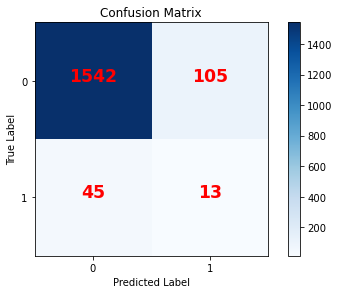

In [34]:
rf = RandomForestClassifier(n_estimators=200, criterion='log_loss').fit(X_train_smote,y_train_smote)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
print_evaluation_report(y_test,y_pred,y_pred_proba)

### Gaussian Naive Bayes (PCA + SMOTE)

F1 Score : 0.40
AUC ROC : 0.62
Precision : 0.05


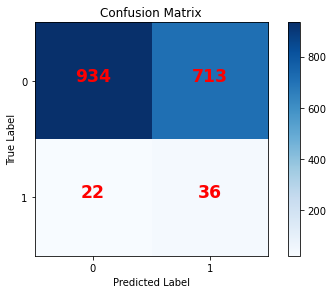

In [35]:

gnb = GaussianNB().fit(X_train_smote,y_train_smote)
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)[:,1]
print_evaluation_report(y_test,y_pred,y_pred_proba)